<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Numerical methods: 10. Boundary-value problems
## Finite-differences method for system of second-order boundary-value equations
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In [1]:
import numpy as np
import numpy.linalg
from scipy import integrate
import matplotlib.pyplot as plt

## Second-order differential equation

We define a **second-order** differential equation with two boundary conditions,
one along each end of the interval:

$$
\begin{array}{rcl}
{{d^2y}\over{dt^2}} &=& f(t,y,y'), \quad t \in [a,b] \\
y(a) &=& \alpha \\
y(b) &=& \beta
\end{array}
$$

This differential equation is called **linear**, when we can rewrite the right-hand side as:
$$
{{d^2y}\over{dt^2}} = p(t) y(t) + q(t) y'(t) + r(t)
$$

There are two steps needed to solve the above differential system with the **shooting method**:

1. Reduce **second-order** to two **first-order** systems.

2. Instead of **boundary-value** problem, solve **initial-value** problem.


----
## Second example problem: linear, inhomogeneous

Can we do better?

Yes, if the system is **linear**, but **inhomogeneous** ($r \ne 0$)!

As an example, solve the second-order differential equation:
$$
y'' = -\frac{2}{t} y' 
       + \frac{2}{t^2} y 
       + \frac{\sin(\ln t)}{t^2}, \quad 1\le t \le 2, \quad y(a)=\alpha, \quad y(b)=\beta
$$

For this differential equation, we know the exact solution:
$$
\begin{array}{rcl}
 y & = & c_1 t 
         + \frac{c_2}{t^2} 
         - \frac{3}{10} \sin(\ln t)
         - \frac{1}{10} \cos(\ln t) \\
 c_2 & = & \frac{1}{70} [8-12\sin(\ln 2) - 4\cos(\ln 2)] \\
 c_1 & = & \frac{11}{10} - c_2
\end{array}
$$
or, as a function:

In [2]:
def fexact(t):
    c2     = (8. - 12.*np.sin(np.log(2.)) - 4.*np.cos(np.log(2.))) / 70.
    c1     = 11. / 10. - c2
    fexact = c1*t + c2/t**2 - 3/10*np.sin(np.log(t)) - 1/10*np.cos(np.log(t))
    return fexact

In [3]:
def p(t): 
    p = -2./t
    return p

def q(t): 
    q = 2./t**2
    return q

def r(t): 
    r = np.sin(np.log(t)) / t**2
    return r

In [11]:
n = 101
a = 0.1
b = 5
alpha = fexact(a)
beta  = fexact(b)
t = np.linspace(a,b,n)
h = t[1]-t[0]
# define solution vector
# NOTE: solution vector w is defined for ALL points
w   = np.zeros(n)
w[0] = alpha
w[n-1] = beta
# define matrix, rhs 
# NOTE: matrix A and rhs are defined on INNER points
A = np.zeros((n-2)*(n-2)).reshape(n-2,n-2)
rhs = np.zeros(n-2)
for i in range(A.shape[0]):
    # set up tri-diagonal matrix
    if (i > 0):
        A[i,i-1] = -1. - p(t[i+1])*h/2.
    A[i,i]   = 2. + q(t[i+1])*h**2
    rhs[i] = -h**2*r(t[i+1])
    if (i < A.shape[0]-1):
        A[i,i+1] = -1. + p(t[i+1])*h/2.
    # set up right-hand side    
    if (i == 0):
        rhs[i] = rhs[i] + (1.+h*p(t[i+1])/2)*alpha
    if (i == A.shape[0]-1):
        rhs[i] = rhs[i] + (1.-h*p(t[i+1])/2)*beta      
# add solution to INNER points of solution vector    
w[1:n-1] = numpy.linalg.solve(A,rhs)
#np.allclose(np.dot(A, w), rhs)

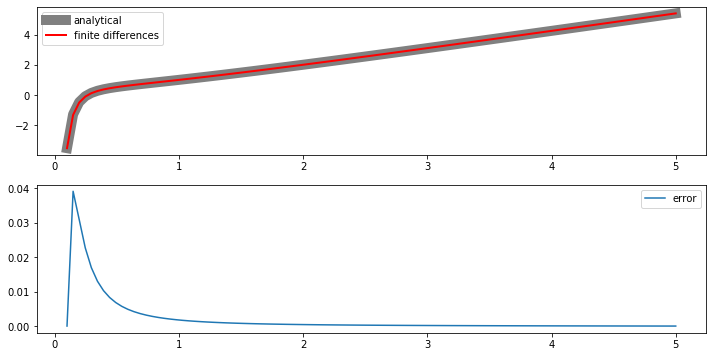

In [12]:
fig,axs = plt.subplots(2,1,figsize=(12,6))
axs[0].plot(t,fexact(t),linewidth=10,color='gray',label='analytical')
axs[0].plot(t,w,linewidth=2,color='red',label='finite differences')
axs[0].legend()
axs[1].plot(t,fexact(t)-w,label='error')
axs[1].legend()

[next>](Numerics_lab10_finite_differences.ipynb)